# РК1 ИУ5-21М Братухин Александр

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
from matplotlib import pyplot as plt
import seaborn as sns

!pip install category_encoders

from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder

from warnings import simplefilter
simplefilter('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [2]:
data = pd.read_csv("credit_train.csv", encoding='cp1251', sep=';')

In [3]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [4]:
data.isna().sum()

,0
client_id,0
gender,0
age,3
marital_status,3
job_position,0
credit_sum,2
credit_month,0
tariff_id,0
score_shk,7
education,5


In [5]:
data = data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 161331 entries, 7 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             161331 non-null  int64  
 1   gender                161331 non-null  object 
 2   age                   161331 non-null  float64
 3   marital_status        161331 non-null  object 
 4   job_position          161331 non-null  object 
 5   credit_sum            161331 non-null  object 
 6   credit_month          161331 non-null  int64  
 7   tariff_id             161331 non-null  float64
 8   score_shk             161331 non-null  object 
 9   education             161331 non-null  object 
 10  living_region         161331 non-null  object 
 11  monthly_income        161331 non-null  float64
 12  credit_count          161331 non-null  float64
 13  overdue_credit_count  161331 non-null  float64
 14  open_account_flg      161331 non-null  int64  
dtypes: fl

In [7]:
data['credit_sum'] = data['credit_sum'].apply(lambda x: x.replace(',','.')).astype('float64')

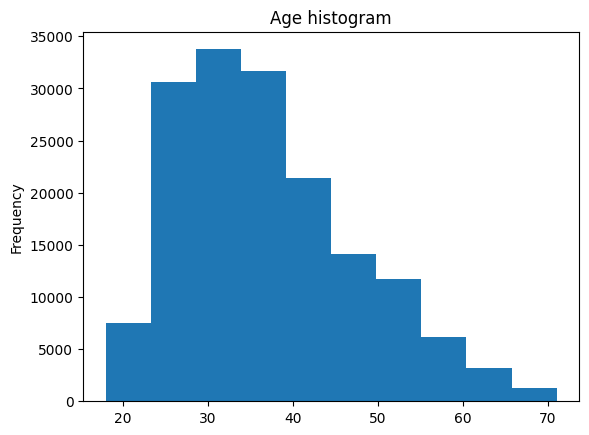

In [8]:
data['age'].plot.hist(title='Age histogram');

# Задание 2

In [9]:
data['marital_status'].unique()

array(['UNM', 'MAR', 'DIV', 'WID', 'CIV'], dtype=object)

In [10]:
data['open_account_flg'].unique()

array([0, 1])

In [11]:
ce_TargetEncoder1 = ce_TargetEncoder()
data_MEAN_ENC = ce_TargetEncoder1.fit_transform(data['marital_status'], data['open_account_flg'])

In [12]:
data_MEAN_ENC.head()

,marital_status
7,0.18326
9,0.18326
10,0.15015
12,0.15015
13,0.15015


# Задание 22

In [13]:
maxScaler = MaxAbsScaler()
data_max_scaled = pd.DataFrame(maxScaler.fit_transform(np.array(data['credit_sum']).reshape(-1, 1)), columns=['credit_sum'])

In [14]:
data['credit_sum'].describe()

,credit_sum
count,161331.000000
mean,25933.408701
std,16192.316435
min,2736.000000
25%,14828.000000
50%,21076.670000
75%,31768.000000
max,200000.000000


In [15]:
data_max_scaled['credit_sum'].describe()

,credit_sum
count,161331.000000
mean,0.129667
std,0.080962
min,0.013680
25%,0.074140
50%,0.105383
75%,0.158840
max,1.000000


# **Диаграмма рассеяния**

<Axes: xlabel='credit_sum', ylabel='age'>

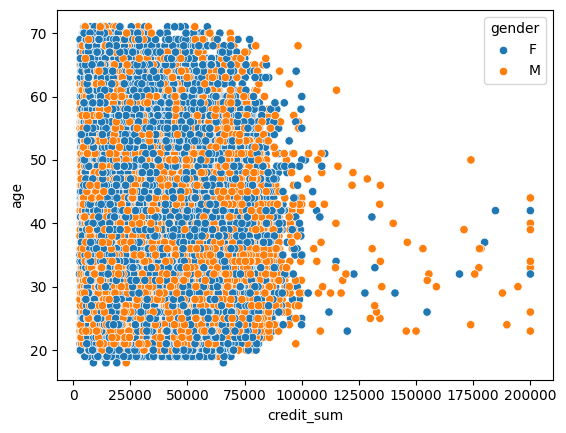

In [17]:
sns.scatterplot(
    data=data,
    y="age",
    x="credit_sum",
    hue="gender"
)